# Gemini Classification Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1200x600 with 0 Axes>

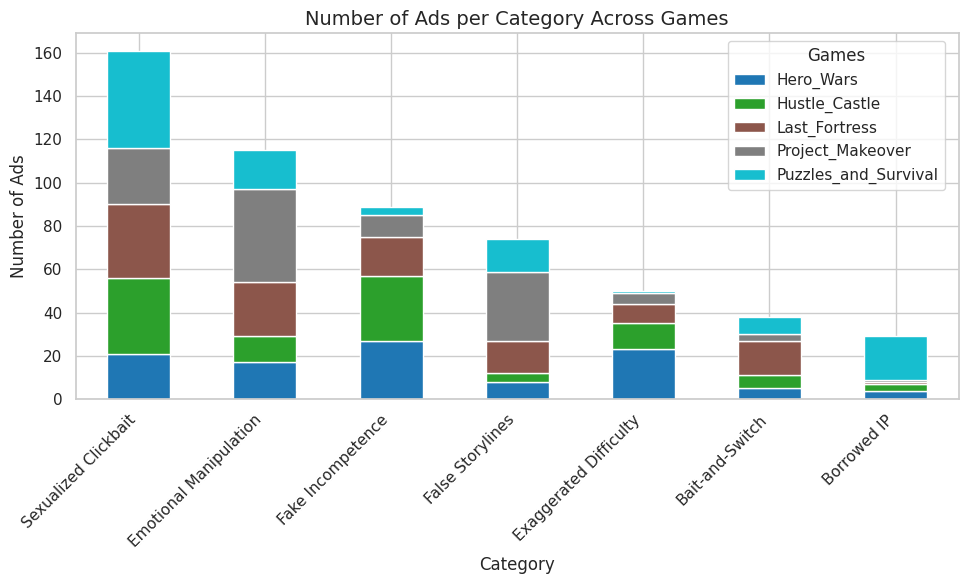

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define the path to the CSV file in Google Drive
csv_file_path = "/content/drive/My Drive/Youtube_Game_Ads/Processed_Responses/gemini_analysis_results.csv"

# Load data
df = pd.read_csv(csv_file_path)

# Extract game names from the "Video" column
df['Game'] = df['Video'].apply(lambda x: re.search(r'/Videos/([^/]+)/', str(x)).group(1) if pd.notna(x) else "Unknown")
df.drop(columns=['Video'], inplace=True)

# Convert categorical columns into binary indicators
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: 1 if pd.notna(x) and len(str(x).strip()) > 0 else 0)

# Group by game and sum the number of ads in each category
category_counts = df.groupby("Game").sum()

# Sort categories by total ads in descending order
category_counts = category_counts.T  # Transpose to sort by total ads per category
category_counts = category_counts.loc[category_counts.sum(axis=1).sort_values(ascending=False).index]  # Sort

# Plot the bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab10")

# Format labels and titles
plt.title("Number of Ads per Category Across Games", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Ads", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Games", bbox_to_anchor=(0.73, 1), loc="upper left")

# Improve layout
plt.tight_layout()
plt.show()


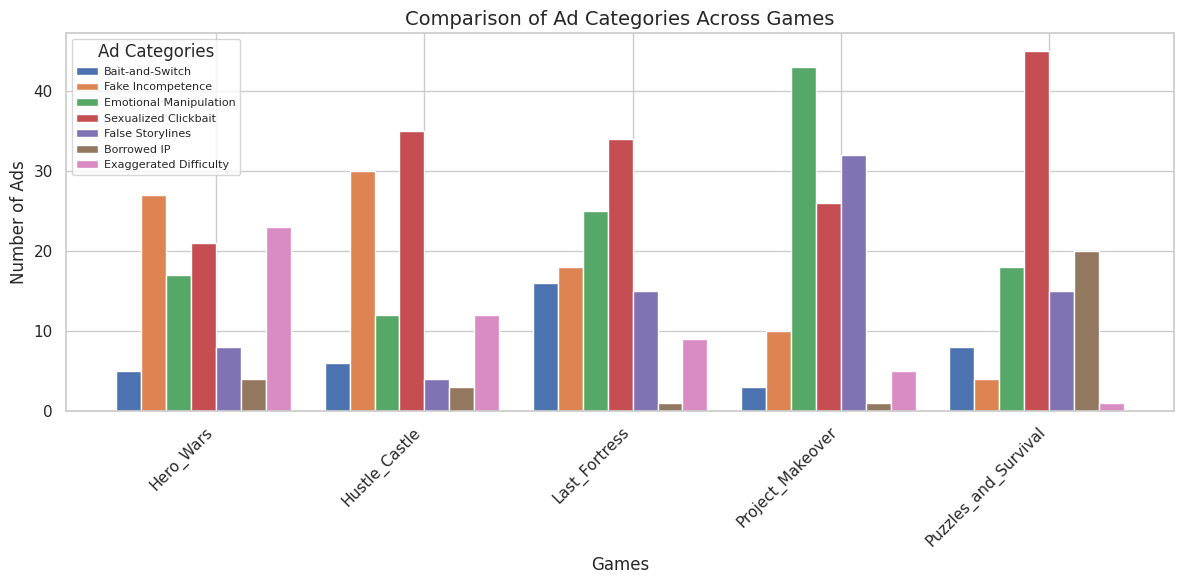

In [46]:
# Load the CSV file
df = pd.read_csv(csv_file_path)

# Extract game names from the "Video" column (assuming game names are in folder paths)
df['Game'] = df['Video'].apply(lambda x: re.search(r'/Videos/([^/]+)/', str(x)).group(1) if pd.notna(x) else "Unknown")

# Drop the "Video" column to focus on categories
df.drop(columns=['Video'], inplace=True)

# Convert categorical values to binary (1 if category is mentioned, 0 otherwise)
for col in df.columns[:-1]:  # Exclude "Game" column
    df[col] = df[col].apply(lambda x: 1 if pd.notna(x) and len(str(x).strip()) > 0 else 0)

# Group by game and sum the number of ads in each category
category_counts = df.groupby("Game").sum()

# Define X locations for the bars
games = category_counts.index
categories = category_counts.columns
x = np.arange(len(games))  # Label locations
width = 0.12  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(x + i * width, category_counts[category], width, label=category)

# Formatting
ax.set_xlabel("Games", fontsize=12)
ax.set_ylabel("Number of Ads", fontsize=12)
ax.set_title("Comparison of Ad Categories Across Games", fontsize=14)
ax.set_xticks(x + width * (len(categories) / 2))  # Adjust tick positions
ax.set_xticklabels(games, rotation=45, ha="right")
ax.legend(title="Ad Categories", bbox_to_anchor=(0, 1), loc="upper left",
          prop={'size': 8}, handletextpad=0.5, labelspacing=0.5)
plt.tight_layout()
plt.show()


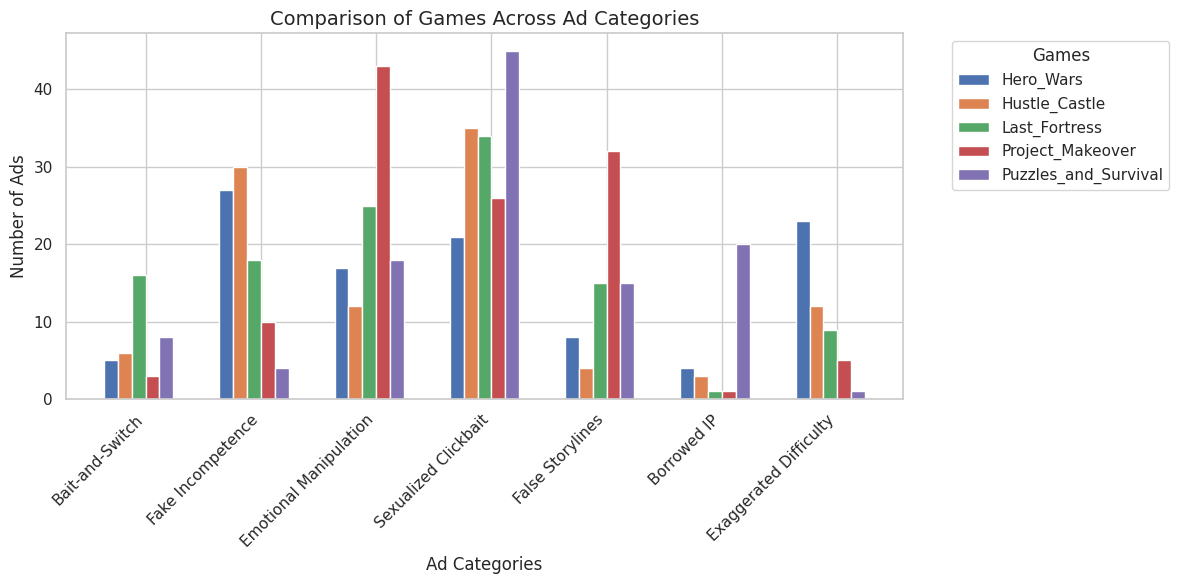

In [51]:
# Group by game and sum the number of ads in each category
category_counts = df.groupby("Game").sum()
category_counts = category_counts.T  # Transpose so categories are X-axis

# Plot grouped bar chart
categories = category_counts.index
games = category_counts.columns
x = np.arange(len(categories))
width = 0.12
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each game
for i, game in enumerate(games):
    ax.bar(x + i * width, category_counts[game], width, label=game)
ax.set_xlabel("Ad Categories", fontsize=12)
ax.set_ylabel("Number of Ads", fontsize=12)
ax.set_title("Comparison of Games Across Ad Categories", fontsize=14)
ax.set_xticks(x + width * (len(games) / 2))  # Adjust tick positions
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend(title="Games", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# Interactive Chart

In [53]:
import plotly.graph_objects as go

category_counts = df.groupby("Game").sum()
df_long = category_counts.reset_index().melt(id_vars="Game", var_name="Category", value_name="Ad Count")
categories = df_long["Category"].unique()

fig = go.Figure()

for category in categories:
    filtered_data = df_long[df_long["Category"] == category]
    fig.add_trace(
        go.Bar(
            x=filtered_data["Game"],
            y=filtered_data["Ad Count"],
            name=category,
            visible=True,  ))

# Create dropdown buttons to filter by category
buttons = [{"label": "All Categories", "method": "update", "args": [{"visible": [True] * len(categories)}]},]

for i, category in enumerate(categories):
    visibility = [False] * len(categories)
    visibility[i] = True

    buttons.append({"label": category, "method": "update", "args": [{"visible": visibility}]})

# Update layout with dropdown
fig.update_layout(
    title="Interactive Comparison of Ad Categories Across Games",
    xaxis_title="Games",
    yaxis_title="Number of Ads",
    updatemenus=[
        {
            "buttons": buttons,
            "direction": "down",
            "showactive": True,
        }])

fig.show()